# Crime Data Exploration

## Author:  Bruce Rushing

In this Notebook, I manipulate a crime data set and explore the data and preprocess it.  The data set I use here is from the UCI Machine Learning Repo.  The data set is the Query Analytics Workloads Dataset.  It is stored in three csv files.

First, we import pandas as well as the tools we will need to manipulate and diagram the data.

In [58]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import random as rm
import os
from IPython.display import display, HTML

Now we import the data and profile it using `pandas_profiling`.

In [37]:
location = '/Users/brucerushing/Documents/PythonPrograms/EMAlgorithm/CrimeData/Datasets/'

data1 = pd.read_csv(os.path.join(location, 'Radius-Queries.csv'))
data2 = pd.read_csv(os.path.join(location, 'Radius-Queries-Count.csv'))
data3 = pd.read_csv(os.path.join(location, 'Range-Queries-Aggregates.csv'))

datasets = [data1, data2, data3]

In [38]:
display(datasets[0])

,0.09002791574273482,-0.01617105315855302,0.351215565177678
0,0.326260,-0.000570,0.379557
1,0.046913,-0.054294,0.292925
2,0.079560,-0.029849,0.416946
3,0.111846,-0.092659,0.349373
4,0.330227,-0.000695,0.453625
...,...,...,...
49994,0.110117,-0.090780,0.275304
49995,0.031257,-0.054150,0.494199
49996,0.308090,-0.146001,0.528061
49997,0.101471,-0.078260,0.324202


In [39]:
display(datasets[1])

,0.17044554302258635,0.2517648519239861,0.10456346342484697,251
0,0.161183,0.122247,0.109897,408
1,0.097526,0.124123,0.100691,468
2,0.077274,0.232118,0.103934,53
3,0.079819,0.240690,0.104495,48
4,0.086824,0.238578,0.103144,50
...,...,...,...,...
9994,0.165496,0.119426,0.103261,288
9995,0.074740,0.147059,0.109752,344
9996,0.094134,0.128956,0.101193,414
9997,0.090355,0.145522,0.107744,344


In [66]:
display(datasets[2])

,Unnamed: 0,x,y,x_range,y_range,count,sum_,avg
0,0,1.159191e+06,1.894756e+06,5225.375665,2981.728431,96046.0,34927.0,1111.618901
1,1,1.159293e+06,1.898922e+06,3499.176007,6879.352245,152668.0,54847.0,1192.855949
2,3,1.160321e+06,1.903776e+06,6495.796780,854.898277,22297.0,5082.0,1260.094676
3,5,1.159843e+06,1.904821e+06,1376.380800,10049.534031,99570.0,28239.0,1311.296003
4,6,1.161389e+06,1.899015e+06,4047.408899,7855.346749,161713.0,48617.0,1218.767774
...,...,...,...,...,...,...,...,...
199995,249994,1.160293e+06,1.904088e+06,7429.771662,3333.061508,140909.0,36974.0,1247.330965
199996,249995,1.158267e+06,1.908710e+06,3008.240474,11278.972817,218960.0,63718.0,1331.949740
199997,249996,1.157245e+06,1.915337e+06,5036.593779,6021.532949,184049.0,42101.0,1448.809339
199998,249997,1.159126e+06,1.911090e+06,1702.060546,10547.069447,104823.0,23446.0,1399.619501


In [40]:
# Rename the column names in the first data set and add the old name to end of the list

col_dict = {}
new_names = ['x-coord', 'y-coord', 'r-radius']
for i, cols in enumerate(datasets[0].columns):
    col_dict[cols] = new_names[i]

new_row = [float(col) for col in datasets[0].columns]
datasets[0].loc[len(datasets[0].index)] = new_row

datasets[0].rename(columns = col_dict, inplace=True)

display(datasets[0])

,x-coord,y-coord,r-radius
0,0.326260,-0.000570,0.379557
1,0.046913,-0.054294,0.292925
2,0.079560,-0.029849,0.416946
3,0.111846,-0.092659,0.349373
4,0.330227,-0.000695,0.453625
...,...,...,...
49995,0.031257,-0.054150,0.494199
49996,0.308090,-0.146001,0.528061
49997,0.101471,-0.078260,0.324202
49998,0.017712,-0.054599,0.553219


In [41]:
# Rename the second data sets columns and add the old column name to end of the list
col_dict = {}
new_names = ['x-coord', 'y-coord', 'r-radius', 'count']

for i, cols in enumerate(datasets[1].columns):
    col_dict[cols] = new_names[i]

new_row = [float(col) for col in datasets[1].columns]
datasets[1].loc[len(datasets[1].index)] = new_row

datasets[1].rename(columns = col_dict, inplace=True)

display(datasets[1])

,x-coord,y-coord,r-radius,count
0,0.161183,0.122247,0.109897,408.0
1,0.097526,0.124123,0.100691,468.0
2,0.077274,0.232118,0.103934,53.0
3,0.079819,0.240690,0.104495,48.0
4,0.086824,0.238578,0.103144,50.0
...,...,...,...,...
9995,0.074740,0.147059,0.109752,344.0
9996,0.094134,0.128956,0.101193,414.0
9997,0.090355,0.145522,0.107744,344.0
9998,0.158791,0.117886,0.105156,340.0


In [42]:
"""profiles = []
location = '/Users/brucerushing/Documents/PythonPrograms/EMAlgorithm/CrimeData/'

for i, data in enumerate(datasets):
    name = location + 'report' + str(i) + '.html'
    ProfileReport(data).to_file(name)"""

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
# Save the cleaned data
os.makedirs('CleanedData', exist_ok=True)
for i, data in enumerate(datasets):
    filename = 'dataset' + str(i+1) + '.csv'
    data.to_csv('CleanedData/' + filename)

The profile reports that the data set is fairly clean so we can now move onto some elementary analysis.

## Analysis

The readme for the data sets describes their contents as thus:

>The dataset 'Radius Queries' contains records of the format: {'X-coordinate','Y-coordinate', 'R-Radius'}. These queries define a disc over a 2D space with center (X,Y) and radius R in order to investigate the number of crime incidents, the total arrests and the average beat of the disc region (spatial area) defined by each query.

>The dataset 'Radius Queries Count' contains records of the format: {'X-coordinate','Y-coordinate', 'R-Radius', 'Count'}. These queries define a disc over a 2D space with center (X,Y) and radius R and the number of crime incidents Count of the disc region (spatial area) defined by each query.

>The dataset 'Range Queries Aggregates' contains records of the format: {'X-coordinate','Y-coordinate', 'X-range', 'Y- range', 'Count', 'SUM', 'AVG'}.
These queries define a rectangle over a 2D space with coordinates/points: X +/- X-range and Y +/- Y-range. The count, sum, and avg is the number of incidents, total arrests and average beat of the rectangle region (spatial area) defined by each query.

Each of these correspond to dataset 1, 2, and 3 respectively.

We begin by converting them to numpy arrays and providing some histograms of the non-location data.

In [44]:
array_datasets = []
for data in datasets:
    array_datasets.append(data.to_numpy())

In [46]:
for arr in array_datasets:
    print(arr.shape)

(50000, 3)
(10000, 4)
(200000, 8)


(array([8.0000e+00, 1.9700e+02, 1.5790e+03, 6.7780e+03, 1.4661e+04,
        1.5567e+04, 8.6050e+03, 2.2910e+03, 2.9600e+02, 1.8000e+01]),
 array([-0.05830742,  0.02729873,  0.11290487,  0.19851102,  0.28411717,
         0.36972332,  0.45532946,  0.54093561,  0.62654176,  0.7121479 ,
         0.79775405]),
 <BarContainer object of 10 artists>)

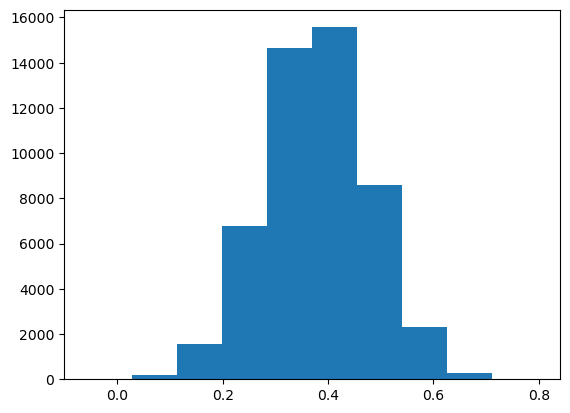

In [55]:
# Plot the histogram for dataset1
%matplotlib inline
plt.hist(array_datasets[0][:,2])

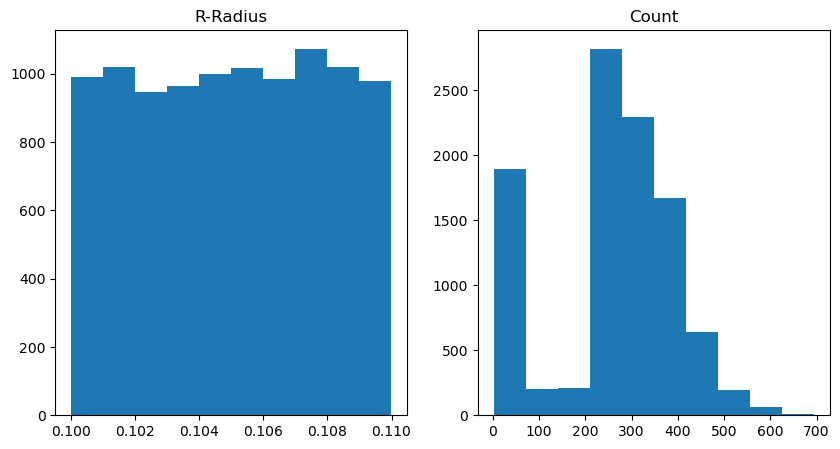

In [65]:
# Plot the histograms for dataset2 on radius and count
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].hist(array_datasets[1][:,2])
ax[0].title.set_text('R-Radius')

ax[1].hist(array_datasets[1][:,3])
ax[1].title.set_text('Count')

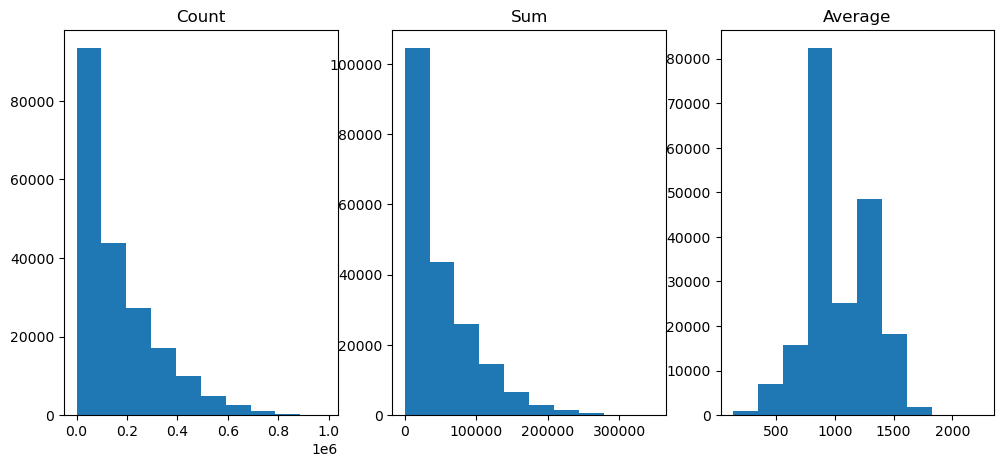

In [70]:
# Plot the histograms for dataset3 on count, sum, and average
fig, ax = plt.subplots(1,3, figsize=(12,5))

ax[0].hist(array_datasets[2][:,5])
ax[0].title.set_text('Count')

ax[1].hist(array_datasets[2][:,6])
ax[1].title.set_text('Sum')

ax[2].hist(array_datasets[2][:,7])
ax[2].title.set_text('Average')

## Scatter Plots

Here I wanted to scatter plot the incidents in each area defined by the 2D discs.  I do this with both the second and third data set.

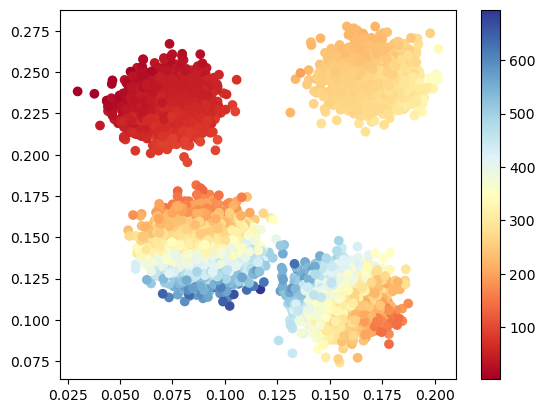

In [74]:
# Plot the counts for the first data set
cm = plt.cm.get_cmap('RdYlBu')
x = array_datasets[1][:,0]
y = array_datasets[1][:,1]
z = array_datasets[1][:,3]
sc = plt.scatter(x, y, c=z, cmap=cm)
plt.colorbar(sc)

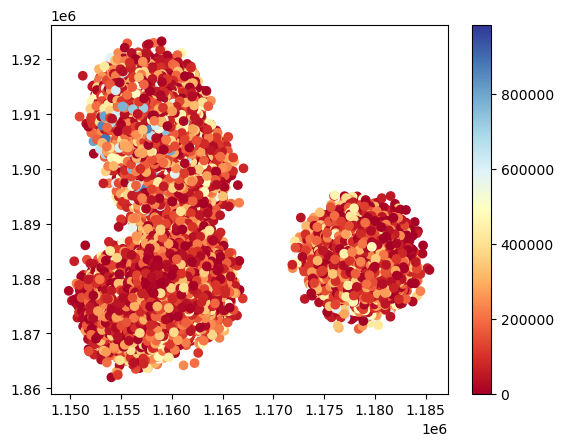

In [75]:
# Plot the counts for the second data set

x = array_datasets[2][:,1]
y = array_datasets[2][:,2]
z = array_datasets[2][:,5]
sc = plt.scatter(x, y, c=z, cmap=cm)
plt.colorbar(sc)

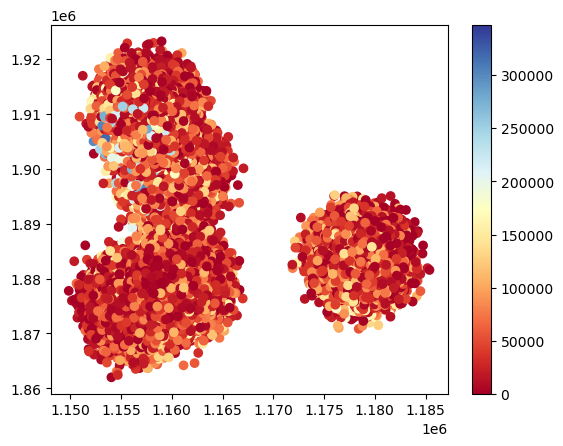

In [76]:
# Plot the sums of total arrests
z = array_datasets[2][:,6]
sc = plt.scatter(x, y, c=z, cmap=cm)
plt.colorbar(sc)

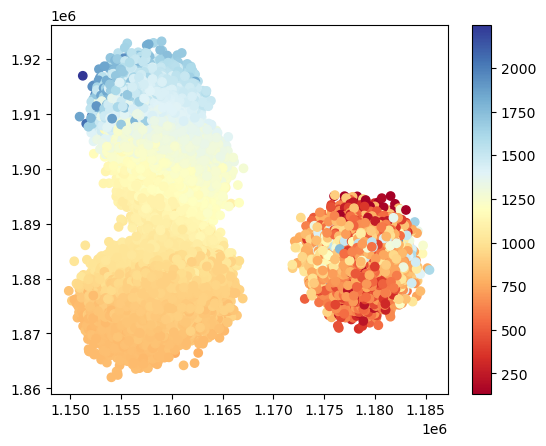

In [77]:
# Plot the average number of arrests
z = array_datasets[2][:,7]
sc = plt.scatter(x, y, c=z, cmap=cm)
plt.colorbar(sc)

This seems to indicate that there are distinct areas in the second data set with a greater number of incidents.  In the the third data set, we see less of this but a clear bias to some neighborhoods having a greater number of average arrests.